<a href="https://colab.research.google.com/github/robertdshaw/forking/blob/main/Hackathon_Loans_Robert_Shaw_Sept_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Supervised Learning Classification: Decision Tree </center></h1>

<center><img src="https://img.freepik.com/free-vector/bank-credit-finance-management-loan-agreement-signing-mortgage-money-credit_335657-3136.jpg?w=826&t=st=1653911422~exp=1653912022~hmac=0f4ff8a8a443e542f79b51f8a572e5d9cf2d39e6eca18b749419db75be96c4c9" width="700" height="400"></center>

<b><h2><center>Hackathon: NBFC Loan Default</center></h2></b>

## Problem Statement

### Context
A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.

The following is the story of a challenge faced by DHDL Ltd. (Name Changed), an NBFC in India. In recent times, the company is struggling to mark profits due to an increase in Loan Defaults. The company aims to determine the relative importance of each parameter with regards to their contribution as to whether a loan is going to default or not. Provided is a sample that contains the data of 90,000 + clients who have taken a loan from the company in the past with the information on whether the loan defaulted. 

### Objective
The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.

### Dataset
The problem contains two datasets, Train Data, and Test Data. Model building is to be done on Train Dataset and the Model testing is to be done on Test Dataset. The output from the Test Data is to be submitted in the Hackathon platform.
Metric to measure
Your score is the percentage of all correct predictions made by you. This is simply known as accuracy. The best accuracy is 1 whereas the worst is 0. It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the dataset.


* ID: unique ID assigned to each applicant
* loan_amnt: loan amount ($) applied each applicant
* loan_term: Loan duration in years
* interest_rate: Applicable interest rate on Loan in %
* loan_grade: Loan Grade Assigned by the bank
* loan_subgrade: Loan SubGrade Assigned by the bank
* job_experience: Number of years job experience 
* home_ownership: Status of House Ownership
* annual_income: Annual income of the applicant
* income_verification_status: Status of Income verification by the bank
* loan_purpose: Purpose of loan
* state_code: State code of the applicant's residence 
* debt_to_income: Ratio to total debt to income (total debt might include other loan aswell)
* delinq_2yrs: number of 30+ days delinquency in past 2 years
* public_records: number of legal cases against the applicant
* revolving_balance: total credit revolving balance
* total_acc: total number of credit lines available in members credit line
* interest_receive: total interest received by the bank on the loan
* application_type: Whether the applicant has applied the loan by creating individuall or joint account
* last_week_pay: How many months have the applicant paid the loan EMI already
* total_current_balance: total current balance of all the accounts of applicant
* total_revolving_limit: total revolving credit limit
* default: "status of loan amount:  1 = Defaulter:  0 = Non Defaulters"


## Loading Libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

## Loading data

In [ ]:
data_train = pd.read_csv("/content/Train_set.csv")

In [ ]:
# copying data to another varaible to avoid any changes to original data
loan = data_train.copy()

## Overview of the data

### View the first and last 5 rows of the dataset.

In [ ]:
# checking the distribution of the target variable
loan["default"].value_counts(1)

0.0    0.761011
1.0    0.238989
Name: default, dtype: float64

In [ ]:
loan.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,debt_consolidation,NC,26.68,0.0,0.0,39519.0,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0.0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,debt_consolidation,SC,31.67,0.0,1.0,9783.0,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0.0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,debt_consolidation,TX,19.70,2.0,0.0,13641.0,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0.0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,debt_consolidation,MO,37.39,0.0,0.0,35020.0,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0.0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,credit_card,TX,8.92,0.0,0.0,23990.0,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0.0


In [ ]:
loan['loan_term'] = loan['loan_term'].factorize(['3 years','5 years'])[0]
loan.head(20)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,0,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,debt_consolidation,NC,26.68,0.0,0.0,39519.0,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0.0
1,14257956,18000,0,13.65,C,C1,<5 Years,OWN,64000.0,Verified,debt_consolidation,SC,31.67,0.0,1.0,9783.0,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0.0
2,66216451,16000,0,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,debt_consolidation,TX,19.70,2.0,0.0,13641.0,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0.0
3,46974169,25000,0,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,debt_consolidation,MO,37.39,0.0,0.0,35020.0,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0.0
4,46725961,17000,0,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,credit_card,TX,8.92,0.0,0.0,23990.0,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0.0
5,56469197,10000,0,12.69,C,C2,<5 Years,OWN,56000.0,Not Verified,debt_consolidation,IL,16.16,0.0,1.0,6643.0,48.0,590.50,INDIVIDUAL,26.0,24054.0,25167.0,0.0
6,3409695,15000,0,11.14,B,B2,10+ years,RENT,100000.0,Not Verified,debt_consolidation,TX,10.51,0.0,1.0,14088.0,14.0,1020.57,INDIVIDUAL,35.0,14519.0,15200.0,1.0
7,26276447,10000,0,6.49,A,A2,10+ years,MORTGAGE,109000.0,Not Verified,credit_card,NY,10.84,1.0,0.0,12337.0,26.0,728.68,INDIVIDUAL,74.0,210751.0,18600.0,0.0
8,48393405,12000,0,10.99,B,B4,<5 Years,RENT,45000.0,Verified,credit_card,CT,8.21,0.0,0.0,10550.0,12.0,879.15,INDIVIDUAL,39.0,10550.0,22000.0,0.0
9,15140624,7000,0,12.49,B,B4,<5 Years,MORTGAGE,53000.0,Not Verified,debt_consolidation,TX,18.84,0.0,0.0,12108.0,20.0,1186.80,INDIVIDUAL,96.0,145801.0,16800.0,0.0


In [ ]:
loan.iloc[3]

ID                                      46974169
loan_amnt                                  25000
loan_term                                3 years
interest_rate                              13.99
loan_grade                                     C
loan_subgrade                                 C4
job_experience                               NaN
home_ownership                          MORTGAGE
annual_income                            59800.0
income_verification_status              Verified
loan_purpose                  debt_consolidation
state_code                                    MO
debt_to_income                             37.39
delinq_2yrs                                  0.0
public_records                               0.0
revolving_balance                          35020
total_acc                                   35.0
interest_receive                         1106.72
application_type                      INDIVIDUAL
last_week_pay                               17.0
total_current_balanc

In [ ]:
loan.tail()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
93169,65577252,3200,3 years,7.26,A,A4,<5 Years,RENT,85000.0,Not Verified,debt_consolidation,FL,17.11,0.0,0.0,7924,38.0,55.34,INDIVIDUAL,13.0,64635.0,47600.0,0
93170,836021,3500,3 years,5.42,A,A1,NaN,MORTGAGE,57550.0,Not Verified,other,FL,22.64,0.0,0.0,10174,24.0,299.67,INDIVIDUAL,161.0,NaN,NaN,1
93171,33058720,8000,3 years,13.98,C,C3,10+ years,RENT,148531.5,Source Verified,credit_card,AK,13.04,1.0,0.0,5391,25.0,1150.58,INDIVIDUAL,65.0,94596.0,6500.0,0
93172,4060472,35000,3 years,17.77,D,D1,<5 Years,RENT,100000.0,Verified,debt_consolidation,CA,17.22,0.0,0.0,24609,45.0,5764.58,INDIVIDUAL,56.0,33759.0,34900.0,1
93173,3628127,10000,3 years,15.80,C,C3,<5 Years,RENT,60000.0,Verified,debt_consolidation,NJ,11.83,0.0,0.0,11285,7.0,2279.36,INDIVIDUAL,104.0,25594.0,12300.0,0


### Understand the shape of the dataset.

In [ ]:
loan.shape

(93174, 23)

* The dataset has 11548 rows and 8 columns of data

### Check the data types of the columns for the dataset.

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   93174 non-null  int64  
 1   loan_term                   93174 non-null  object 
 2   interest_rate               93174 non-null  float64
 3   loan_grade                  93174 non-null  object 
 4   loan_subgrade               93174 non-null  object 
 5   job_experience              88472 non-null  object 
 6   home_ownership              93174 non-null  object 
 7   annual_income               93173 non-null  float64
 8   income_verification_status  93174 non-null  object 
 9   loan_purpose                93174 non-null  object 
 10  state_code                  93174 non-null  object 
 11  debt_to_income              93174 non-null  float64
 12  delinq_2yrs                 93172 non-null  float64
 13  public_records              931

**Observations -**
* default is the dependent variable - type float64.
* The dependent variables are a mix of objects and numerical values.
* job_experience, public_records, revolving_balance, total_acc, interest_receive, application_type, last_week_pay, total_current_balance and total_revolving_limit are missing values.

### Summary of the dataset



In [ ]:
loan.describe(include="all")

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
count,9.317400e+04,93174.000000,93174,93174.000000,93174,93174,88472,93174,9.317300e+04,93174,93174,93174,93174.000000,93172.000000,93172.000000,9.317400e+04,93172.000000,93174.000000,93174,91250.000000,8.578800e+04,8.578800e+04,93174.000000
unique,NaN,NaN,2,NaN,7,35,3,5,NaN,3,4,50,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,3 years,NaN,B,B3,<5 Years,MORTGAGE,NaN,Source Verified,debt_consolidation,CA,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN
freq,NaN,NaN,65211,NaN,26865,5879,40610,46445,NaN,34487,55241,13744,NaN,NaN,NaN,NaN,NaN,NaN,93118,NaN,NaN,NaN,NaN
mean,3.505021e+07,14733.861378,NaN,13.233433,NaN,NaN,NaN,NaN,7.502826e+04,NaN,NaN,NaN,18.127623,0.316994,0.196121,1.685447e+04,25.248905,1747.263530,NaN,58.154882,1.392529e+05,3.208590e+04,0.237502
std,2.414926e+07,8428.184858,NaN,4.368728,NaN,NaN,NaN,NaN,6.945478e+04,NaN,NaN,NaN,8.563084,0.880859,0.581188,2.368907e+04,11.855061,2088.236141,NaN,44.326560,1.576868e+05,4.705251e+04,0.425555
min,7.073500e+04,500.000000,NaN,5.320000,NaN,NaN,NaN,NaN,1.200000e+03,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.085983e+07,8000.000000,NaN,9.990000,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,11.930000,0.000000,0.000000,6.433000e+03,17.000000,439.880000,NaN,22.000000,2.964200e+04,1.400000e+04,0.000000
50%,3.710751e+07,13000.000000,NaN,12.990000,NaN,NaN,NaN,NaN,6.400000e+04,NaN,NaN,NaN,17.640000,0.000000,0.000000,1.185600e+04,24.000000,1070.755000,NaN,48.000000,7.936350e+04,2.370000e+04,0.000000
75%,5.859895e+07,20000.000000,NaN,16.200000,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,23.890000,0.000000,0.000000,2.074500e+04,32.000000,2219.612500,NaN,83.000000,2.071600e+05,3.970000e+04,0.000000


**Observations-**   

* Most of the loans are for a 36-month term loan.
* Most loan applications are for debt consolidation.
* Most customers have mortgaged their houses.
* On average customers seek a loan of about 15,000 USD.


In [ ]:
# checking for unique values in ID column
loan["ID"].nunique()

93174

* Since all the values in ID column are unique we can drop it

In [ ]:
loan.drop(["ID"], axis=1, inplace=True)

### Check for missing values

* There are missing values in the dataset

In [ ]:
loan.isnull().sum()

loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [ ]:
round(loan.isnull().sum() / loan.isnull().count() * 100, 2)

loan_amnt                     0.00
loan_term                     0.00
interest_rate                 0.00
loan_grade                    0.00
loan_subgrade                 0.00
job_experience                5.05
home_ownership                0.00
annual_income                 0.00
income_verification_status    0.00
loan_purpose                  0.00
state_code                    0.00
debt_to_income                0.00
delinq_2yrs                   0.00
public_records                0.00
revolving_balance             0.00
total_acc                     0.00
interest_receive              0.00
application_type              0.00
last_week_pay                 2.06
total_current_balance         7.93
total_revolving_limit         7.93
default                       0.00
dtype: float64

In [ ]:
loan["last_week_pay"] = loan["last_week_pay"].fillna(loan["last_week_pay"].mean()) 
loan["total_current_balance"] = loan["total_current_balance"].fillna(loan["total_current_balance"].mean())
loan["total_revolving_limit"] = loan["total_revolving_limit"].fillna(loan["total_revolving_limit"].mean())

In [ ]:
#loan['job_experience'] = loan['job_experience'].fillna(loan['job_experience'].mode())

In [ ]:
#loan2 = loan.dropna(axis=0, how='any')

In [ ]:
#loan = loan.dropna(how='all',
                    subset=['annual_income', 'delinq_2yrs', 'public_records', 'total_acc'])

In [ ]:
loan["duration"] = loan["duration"].fillna(
    value=loan.groupby(["genre", "mediaType"])["duration"].transform("mode")

In [ ]:
loan.isnull().sum()

loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                    0
total_current_balance            0
total_revolving_limit            0
default                          0
dtype: int64

In [ ]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
loan2 = loan.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
loan2.isnull().sum()

loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   93174 non-null  int64  
 1   loan_term                   93174 non-null  object 
 2   interest_rate               93174 non-null  float64
 3   loan_grade                  93174 non-null  object 
 4   loan_subgrade               93174 non-null  object 
 5   job_experience              88472 non-null  object 
 6   home_ownership              93174 non-null  object 
 7   annual_income               93173 non-null  float64
 8   income_verification_status  93174 non-null  object 
 9   loan_purpose                93174 non-null  object 
 10  state_code                  93174 non-null  object 
 11  debt_to_income              93174 non-null  float64
 12  delinq_2yrs                 93172 non-null  float64
 13  public_records              931

In [ ]:
# Making a list of all categorical variables
cat_col = [
    "loan_term",
    "loan_grade",
    "loan_subgrade",
    "job_experience",
    "home_ownership",
    "income_verification_status",
    "loan_purpose",
    "state_code",
    "application_type"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(loan[column].value_counts())
    print("-" * 40)

3 years    65211
5 years    27963
Name: loan_term, dtype: int64
----------------------------------------
B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: loan_grade, dtype: int64
----------------------------------------
B3    5879
B4    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: loan_subgrade, dtype: int64
----------------------------------------
<5 Years      40610
10+ years     30362
6-10 years    17500
Name: job_experience, dtype: int64
----------------------------------------
MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18
NONE            8
Name: home_ownership, dtype: int64
-------------------------

## Exploratory Data Analysis (EDA)

**The below functions need to be defined to carry out the EDA.**

In [ ]:
# We create a function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate analysis

#### Observations on default

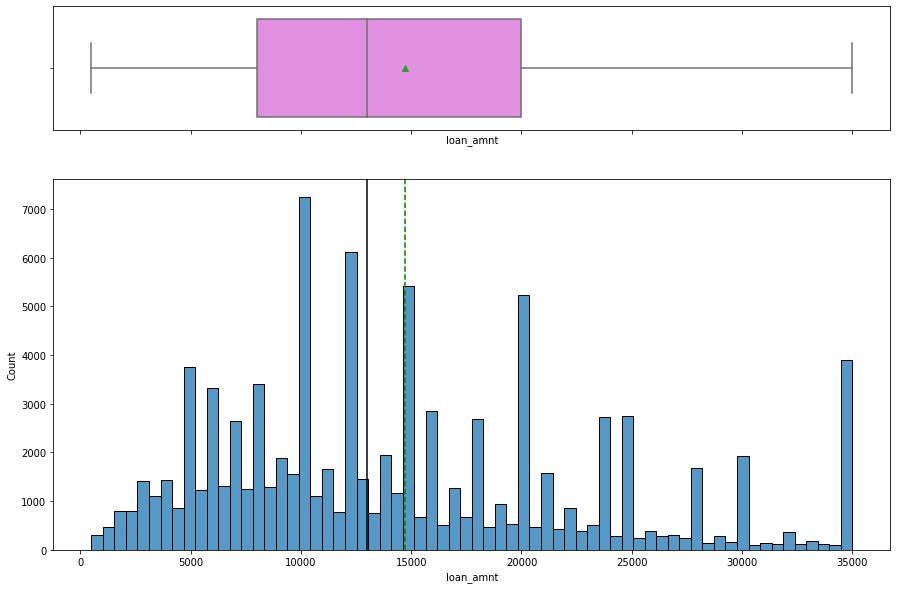

In [ ]:
histogram_boxplot(loan2, "loan_amnt")

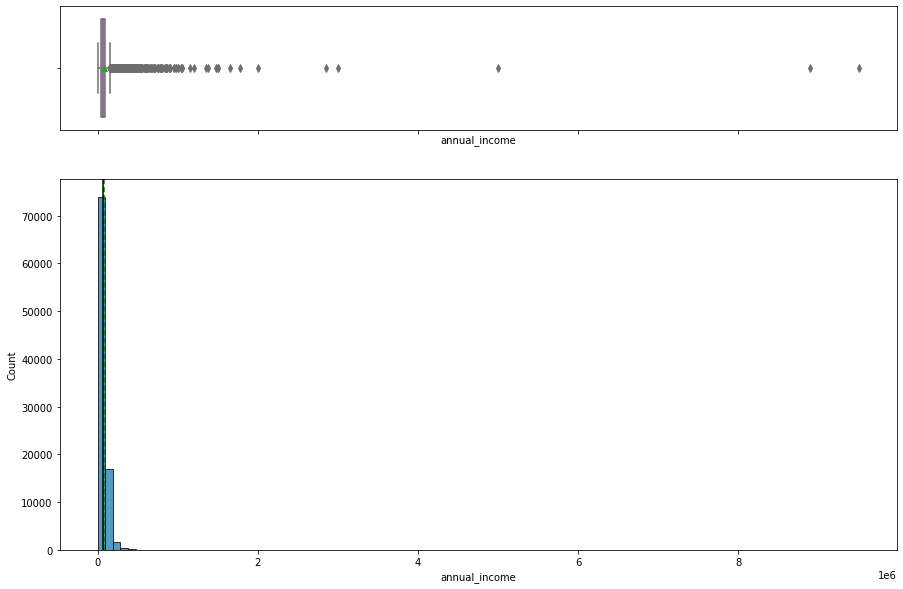

In [ ]:
histogram_boxplot(loan2, "annual_income", bins=100)

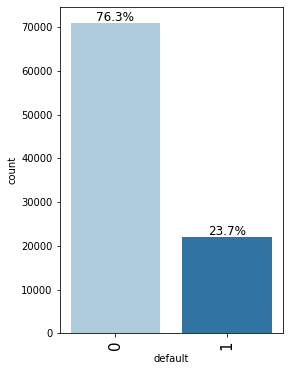

In [ ]:
labeled_barplot(loan2, "default", perc=True)

* 23.7% of the customers default

#### Observations on term

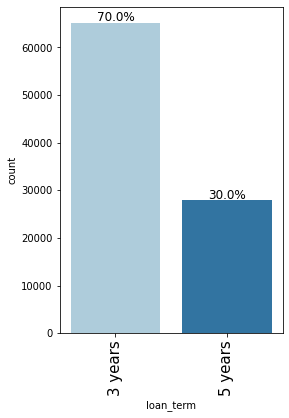

In [ ]:
labeled_barplot(loan2, "loan_term", perc=True)

* 70% of the loans are for a 36-month term.

#### Observations on grade

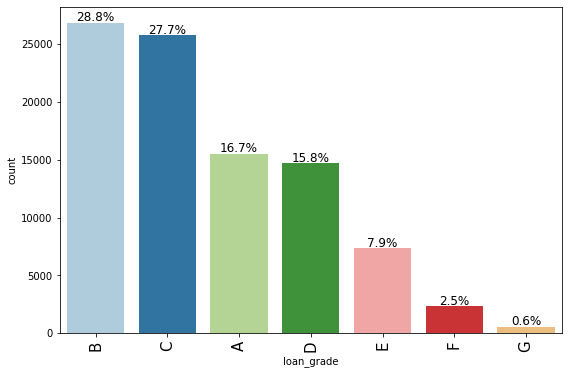

In [ ]:
labeled_barplot(loan2, "loan_grade", perc=True)

* Loans are graded from A to G.
* Most loan applications are graded B (28.8%) followed by A loans (27.6%)
* The lowest grade level is G at 0.6%.

#### Observations on sub-grade

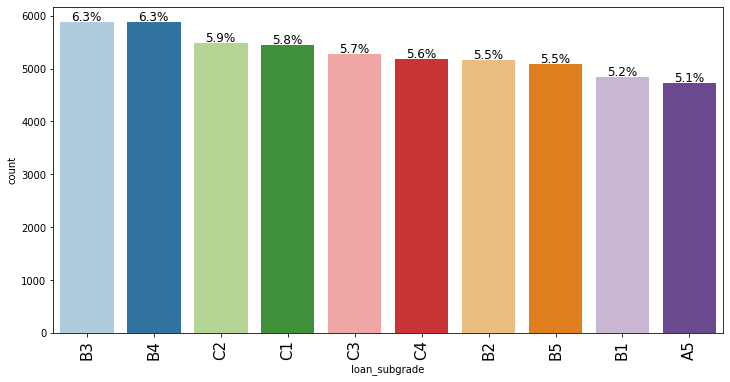

In [ ]:
labeled_barplot(loan2, "loan_subgrade", perc=True, n=10)

* Loans are sub-graded from A1-A5 down to G1-G5.  
* Most sub-graded loans are for B1-B5 (28.9%). 

#### Observations on Job Experience

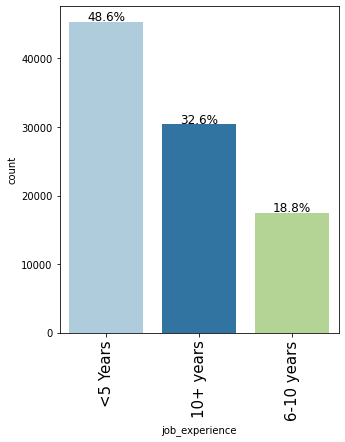

In [ ]:
labeled_barplot(loan2, "job_experience", perc=True)

* Most applicants (48.6%) have less than 5 years of job experience.
* Just under one third of applicants have over 10 years of job experience.

#### Observations on home ownership

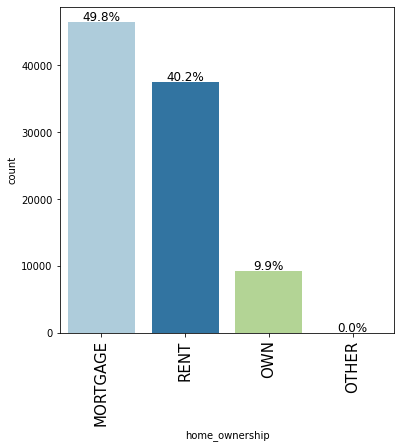

In [ ]:
labeled_barplot(loan2, "home_ownership", perc=True)

* 50% of applicants have a mortgage.
* Less than 10% of applicants own their own house. 

#### Observations on income verification status

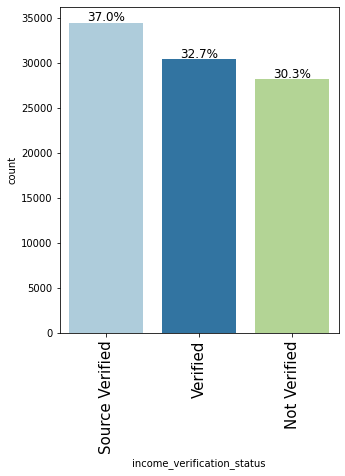

In [ ]:
labeled_barplot(loan2, "income_verification_status", perc=True)

* Most customers (69.7%) are either source verified or otherwise verified.

#### Observations on loan purpose

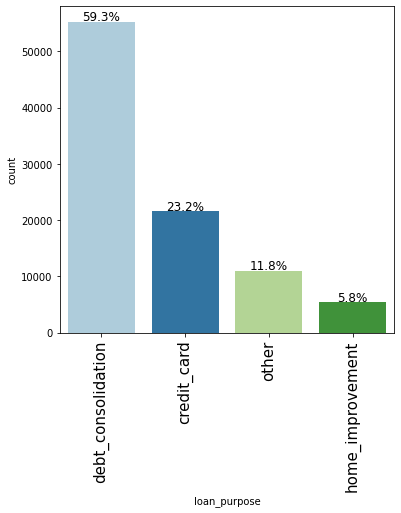

In [ ]:
labeled_barplot(loan2, "loan_purpose", perc=True)

* Most loans (59.3%) are taken out as a new loan arrangement under debt consolidation.

#### Observations on States issuing loans

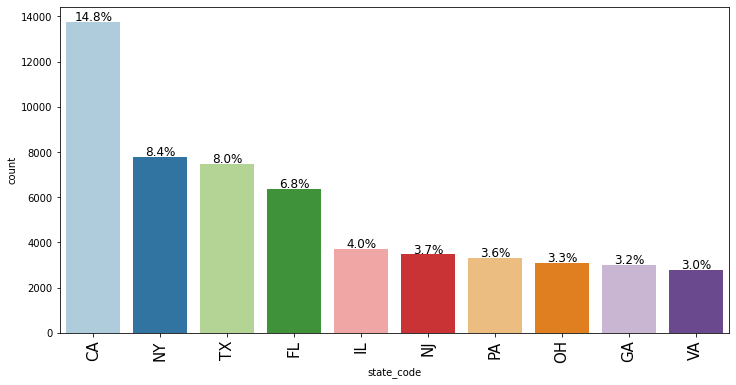

In [ ]:
labeled_barplot(loan2, "state_code", perc=True, n=10)

* The top 5 States for issuing loans are:
1. California (14.8%)
2. New York (8.4%)
3. Texas (8.0%)
4. Florida (6.8%)
5. Illinois (4.0%)

#### Observations on Application types

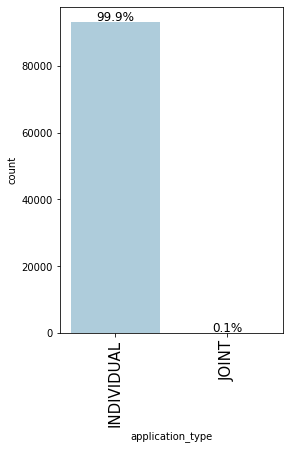

In [ ]:
labeled_barplot(loan2, "application_type", perc=True)

* Almost 100 percent of applications are made by individuals.

### Data Cleaning

In [ ]:
loan2["home_ownership"].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER'], dtype=object)

#### We can merge the ownership -  'NONE' and 'OTHER' together

In [ ]:
loan2["home_ownership"].replace("NONE", "OTHER", inplace=True)

In [ ]:
loan2["home_ownership"].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER'], dtype=object)

### Bivariate Analysis

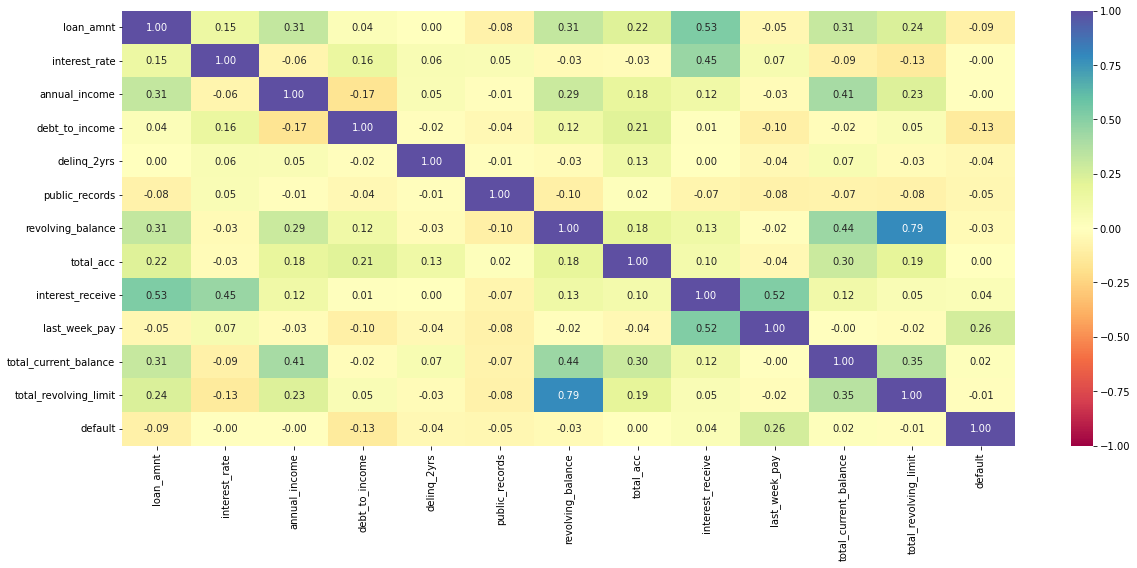

In [ ]:
cols_list = loan2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 8))
sns.heatmap(
    loan[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

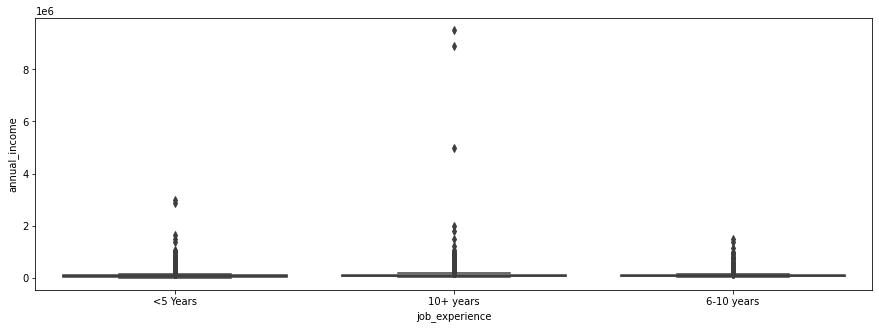

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=loan2, x="job_experience", y="annual_income")
plt.show()

#### term vs default

default        0      1    All
loan_term                     
All        71045  22128  93173
3 years    47345  17865  65210
5 years    23700   4263  27963
------------------------------------------------------------------------------------------------------------------------


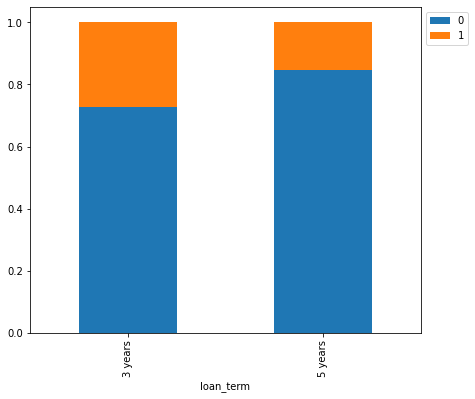

In [ ]:
stacked_barplot(loan2, "loan_term", "default")

* Most loan delinquent customers have taken loan for 36 months.

#### loangrade vs default

default         0      1    All
loan_grade                     
All         71045  22128  93173
B           19787   7078  26865
C           20203   5584  25787
A           11281   4252  15533
D           11478   3237  14715
E            6003   1375   7378
F            1862    482   2344
G             431    120    551
------------------------------------------------------------------------------------------------------------------------


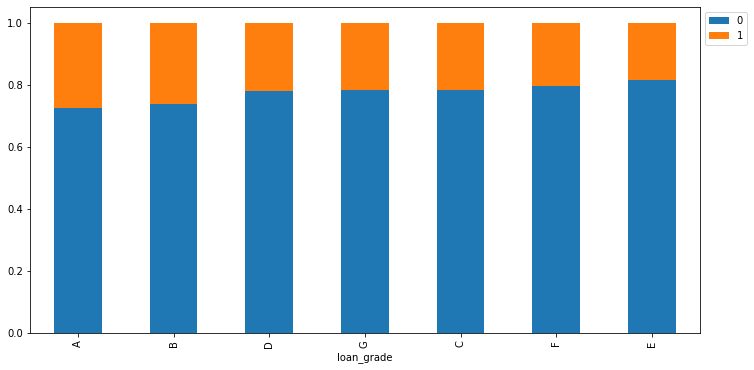

In [ ]:
stacked_barplot(loan2, "loan_grade", "default")

* Most applicants default on Grade A (25%) and B loans (24%). 

#### Purpose vs default

default                 0      1    All
loan_purpose                           
All                 71045  22128  93173
debt_consolidation  42408  12833  55241
credit_card         17006   4565  21571
other                7563   3407  10970
home_improvement     4068   1323   5391
------------------------------------------------------------------------------------------------------------------------


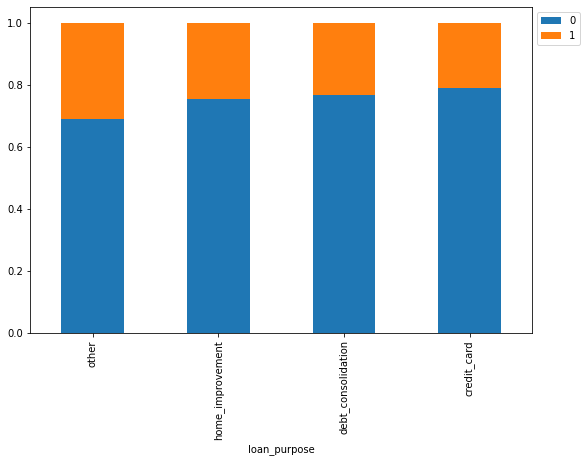

In [ ]:
stacked_barplot(loan2, "loan_purpose", "default")

* Most loan delinquent customers are those who have applied for other loans, then home improvement loans, followed by debt consolidation, and credit card loans.

#### home_ownership vs default

default             0      1    All
home_ownership                     
All             71045  22128  93173
MORTGAGE        35316  11129  46445
RENT            28401   9048  37449
OWN              7323   1931   9254
OTHER               5     20     25
------------------------------------------------------------------------------------------------------------------------


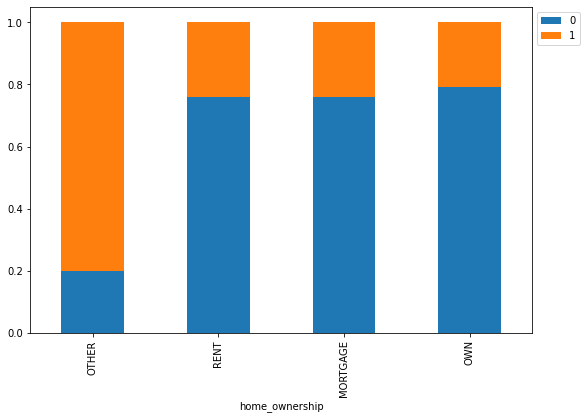

In [ ]:
stacked_barplot(loan2, "home_ownership", "default")

* Those customers who have their own house are less delinquent than the ones who live in a rented place or have mortgaged their home.

#### job experience vs default

default             0      1    All
job_experience                     
All             71045  22128  93173
<5 Years        34282  11029  45311
10+ years       23656   6706  30362
6-10 years      13107   4393  17500
------------------------------------------------------------------------------------------------------------------------


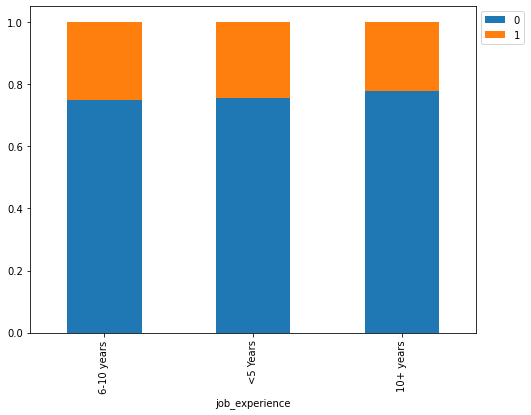

In [ ]:
stacked_barplot(loan2, "job_experience", "default")

* Customers with between 6-10 years of job experience are more delinquent.

#### Income verification status vs Default

default                         0      1    All
income_verification_status                     
All                         71045  22128  93173
Not Verified                20329   7907  28236
Verified                    22654   7796  30450
Source Verified             28062   6425  34487
------------------------------------------------------------------------------------------------------------------------


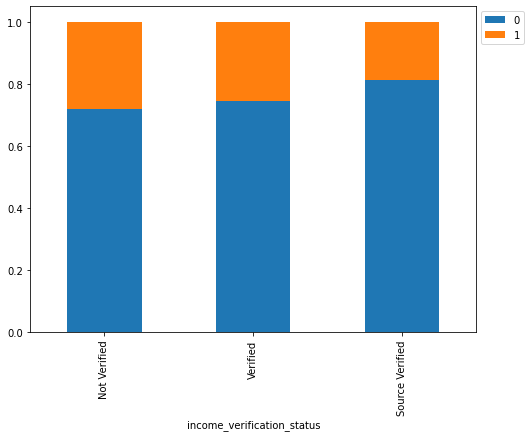

In [ ]:
stacked_barplot(loan2, "income_verification_status", "default")

* If not verified, the chances of delinquency increase a bit compared to when verified.

## Data Preprocessing

### Data Preparation for Modeling

In [ ]:
X = loan2.drop(["default"], axis=1)
y = loan2["default"]

In [ ]:
import statsmodels.api as sm
# Add the intercept to data
X = sm.add_constant(X)

In [ ]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,const,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term_5 years,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,loan_subgrade_E3,loan_subgrade_E4,loan_subgrade_E5,loan_subgrade_F1,loan_subgrade_F2,loan_subgrade_F3,loan_subgrade_F4,loan_subgrade_F5,loan_subgrade_G1,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,job_experience_6-10 years,job_experience_<5 Years,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income_verification_status_Source Verified,income_verification_status_Verified,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_other,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_JOINT
0,1.0,9000,9.17,85000.0,26.68,0.0,0.0,39519,20.0,59.60,4.0,95493.0,84100.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,18000,13.65,64000.0,31.67,0.0,1.0,9783,24.0,3348.25,95.0,185433.0,13500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1.0,16000,7.26,150000.0,19.70,2.0,0.0,13641,27.0,276.69,13.0,180519.0,19300.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.0,25000,13.99,59800.0,37.39,0.0,0.0,35020,35.0,1106.72,17.0,183208.0,55400.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,17000,6.39,72000.0,8.92,0.0,0.0,23990,26.0,725.29,39.0,23990.0,81300.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


**Creating training and test sets.**

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Model Building - Decision Tree Model

### Build Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model performance evaluation

### Model can make wrong predictions as:
 
1. Predicting a customer will not be behind on payments (Non-Delinquent) but in reality the customer would be behind on payments.

2. Predicting a customer will be behind on payments (Delinquent) but in reality the customer would not be behind on payments (Non-Delinquent). 


### Which case is more important? 

* If we predict a non-delinquent customer as a delinquent customer bank would lose an opportunity of providing loan to a potential customer.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking model performance on training set

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


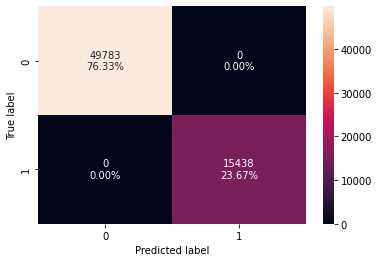

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

### Checking model performance on test set

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

NameError: ignored

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

* Model is giving good and generalized results on training and test set.

### Visualizing the Decision Tree

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* FICO score, duration of loan and gender are the top 3 important features.

### Decision Tree (Pre-pruning)

#### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

### Checking performance on training set

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* The Recall has improved on the training set as compared to the initial model.

### Checking model performance on test set

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model has performance has remained same and the model has become simpler.

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* We are getting a simplified tree after pre-pruning.

### Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

### Checking model performance on training set

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

### Checking model performance on test set

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.

### Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* FICO score, duration of the loan, and gender remain the most important feature with post-pruning too.

## Comparison of Models and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

## Conclusions and Recommendations

* FICO, term and gender (in that order) are the most important variables in determining if a borrower will get into a delinquent stage 
* No borrower shall be given a loan if they are applying for a 36 month term loan and 
have a FICO score in the range 300-500.
* Female borrowers with a FICO score greater than 500 should be our target customers.
* Criteria to approve loan according to decision tree model should depend on three main factors - FICO score, duration of loan and gender that is - If the FICO score is less than 500 and the duration of loan is less than 60 months then the customer will not be able to repay the loans. If the customer has greater than 500 FICO score and is a female higher chances that they will repay the loans.